In [21]:

import pandas as pd

In [22]:
pdf = pd.read_csv(r'./Data/new_york_hotels.csv',encoding='windows-1252')

display(pdf)
pdf.info()

,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate
0,269955,Hilton Garden Inn Albany/SUNY Area,1389 Washington Ave,Albany,NY,12206,42.68751,-73.81643,3.0,154.0272,124.0216
1,113431,Courtyard by Marriott Albany Thruway,1455 Washington Avenue,Albany,NY,12206,42.68971,-73.82021,3.0,179.0100,134.0000
2,108151,Radisson Hotel Albany,205 Wolf Rd,Albany,NY,12205,42.72410,-73.79822,3.0,134.1700,84.1600
3,254756,Hilton Garden Inn Albany Medical Center,62 New Scotland Ave,Albany,NY,12208,42.65157,-73.77638,3.0,308.2807,228.4597
4,198232,CrestHill Suites SUNY University Albany,1415 Washington Avenue,Albany,NY,12206,42.68873,-73.81854,3.0,169.3900,89.3900
...,...,...,...,...,...,...,...,...,...,...,...
1626,324259,Residence Inn Yonkers Westchester County,7 Executive Blvd,Yonkers,NY,10701,40.97275,-73.88075,3.0,269.3600,169.3600
1627,107949,Ramada Inn Yonkers,125 Tuckahoe Rd,Yonkers,NY,10710,40.95466,-73.86483,2.5,129.0000,119.0000
1628,509723,Hyatt Place New York/Yonkers,7000 Mall Walk,Yonkers,NY,10704,40.92625,-73.85438,3.0,249.3100,199.3100
1629,621870,Hampton Inn & Suites Yonkers - Westchester,555 Tuckahoe Rd,Yonkers,NY,10710,40.95375,-73.84935,2.5,189.1900,134.1800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ean_hotel_id    1631 non-null   int64  
 1   name            1631 non-null   object 
 2   address1        1631 non-null   object 
 3   city            1631 non-null   object 
 4   state_province  1631 non-null   object 
 5   postal_code     1631 non-null   object 
 6   latitude        1631 non-null   float64
 7   longitude       1631 non-null   float64
 8   star_rating     1630 non-null   float64
 9   high_rate       1631 non-null   float64
 10  low_rate        1631 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 140.3+ KB


In [23]:
print(pdf['address1'].value_counts())

display(pdf[pdf['address1'] == '1717 Broadway']) #different hotels near the same address

print(pdf['name'].value_counts())

display(pdf[pdf['name'] == 'Quality Inn']) #same hotels with different address/locations. check to drop duplicates for this

print(pdf['star_rating'].value_counts()) #one star rating is a string for null

print(pdf['postal_code'].value_counts())
def getints(x):
    try:
        val = int(x)
    except:
        val = 0
    return val
pdf['postalcodeint'] = pdf['postal_code'].map(lambda x: getints(x))

display(pdf[pdf['postalcodeint'] == 0]) #the postal codes that have the extra 4 digits. I probably remove them?

print(pdf['state_province'].value_counts())

print(pdf['high_rate'].value_counts())


Various Addresses                    5
1717 Broadway                        2
500 Westage Business Center Drive    2
38 West 31st Street                  2
300 West Fayette Street              2
                                    ..
371 Elmira Road                      1
120 S Aurora St                      1
853 Coddington Road                  1
1150 Danby Road                      1
5 Executive Boulevard                1
Name: address1, Length: 1621, dtype: int64


,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate
830,438712,Residence Inn New York Manhattan/Central Park,1717 Broadway,New York,NY,10019,40.76427,-73.98245,3.5,444.01,339.01
1088,438668,Courtyard by Marriott New York Manhattan / Cen...,1717 Broadway,New York,NY,10019,40.76421,-73.98246,3.5,599.02,180.01


Americas Best Value Inn                             8
Quality Inn                                         7
Econo Lodge                                         4
Comfort Inn                                         4
Rodeway Inn                                         3
                                                   ..
Sheraton JFK Airport Hotel                          1
Sleep Inn JFK Airport Rockaway Blvd                 1
Holiday Inn Express Kennedy Airport                 1
Howard Johnson Jamaica NY Near AirTrain JFK         1
Courtyard by Marriott Yonkers Westchester County    1
Name: name, Length: 1602, dtype: int64


,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate
175,496013,Quality Inn,95 Chester Street,Brooklyn,NY,11212,40.66930,-73.91160,2.5,150.0172,140.0083
516,239820,Quality Inn,4142 Albany Post Rd,Hyde Park,NY,12538,41.77417,-73.93068,2.5,110.3900,105.3900
522,133407,Quality Inn,356 Elmira Rd,Ithaca,NY,14850,42.42308,-76.51589,2.5,114.3500,109.3500
679,121724,Quality Inn,551 S Transit St,Lockport,NY,14094,43.15261,-78.69687,2.5,80.3900,70.3900
696,258330,Quality Inn,30-03 40th Ave,Long Island City,NY,11101,40.75188,-73.93448,2.5,126.4900,125.4900
1445,219452,Quality Inn,2788 Hamburg Street,Schenectady,NY,12303,42.77245,-73.93658,2.5,99.4800,99.0000
1470,124296,Quality Inn,100 Spring Valley Marketplace,Spring Valley,NY,10977,41.10456,-74.02559,2.5,130.0600,100.0500


2.5    445
3.0    380
2.0    318
3.5    196
4.0    170
4.5     46
5.0     42
1.5     28
1.0      5
Name: star_rating, dtype: int64
10019    53
10036    48
10018    37
10001    36
10016    31
         ..
14471     1
13655     1
10911     1
10922     1
10704     1
Name: postal_code, Length: 461, dtype: int64


,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate,postalcodeint
230,476203,Best Western University Inn,90 E Main Street,Canton,NY,13617-1452,44.59663,-75.15347,3.0,149.4400,116.4400,0
237,397560,Chalet Inn & Suites Centerport,23 Centershore Road,Centerport,NY,11721-1526,40.88800,-73.37216,2.0,120.0077,119.0077,0
308,542081,Best Western Plus LaGuardia Airport Hotel Queens,112-26 Roosevelt Avenue,Corona,NY,11368-2624,40.75223,-73.85364,3.0,180.1381,117.0863,0
566,577480,Days Inn & Suites Jamaica JFK Airport,9565 Tuckerton St,Jamaica,NY,11433-1043,40.69870,-73.80108,2.5,149.9032,101.7584,0
654,108831,Quality Inn & Suites Albany Airport,611 Troy-Schenectady Rd.,Latham,NY,12110-2505,42.75447,-73.77033,2.5,145.4600,95.4600,0
717,207035,Red Roof Inn PLUS+ & Suites Malone,42 Finney Blvd,Malone,NY,12953-1708,44.84740,-74.30076,2.5,139.3200,90.3200,0
777,238663,Americas Best Value Inn-New Paltz,7 Terwilliger Ln,New Paltz,NY,12561-1619,41.74148,-74.06729,2.0,76.3700,75.3700,0
1182,653543,The Watson Hotel,440 West 57th Street,New York,NY,10019-3013,40.76823,-73.98745,3.5,249.3200,229.3200,0
1191,108961,Howard Johnson Inn - Newburgh,95 Route 17K,Newburgh,NY,12550-5009,41.50539,-74.07329,2.0,80.4700,55.4700,0
1252,201380,Super 8 Oneida Verona,215 Genesee Street,Oneida,NY,13421-2701,43.07879,-75.65346,2.0,122.3500,76.4900,0


NY    1631
Name: state_province, dtype: int64
0.0000      14
139.0000     6
100.0000     5
69.9900      5
110.3900     4
            ..
150.0000     1
724.8400     1
66.0041      1
124.9970     1
189.1900     1
Name: high_rate, Length: 1429, dtype: int64


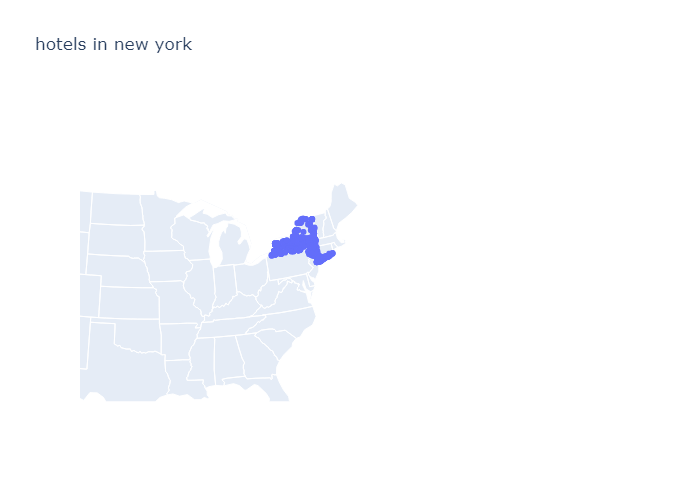

In [24]:
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd



fig = go.Figure(data=go.Scattergeo(
    # locationmode = 'country names',
        lon = pdf['longitude'],
        lat = pdf['latitude'],
        text = pdf['name'],
        mode = 'markers',
        # marker_color = pdf['star_rating'],
        # marker = dict(
        #     size = 8,
        #     opacity = 0.8,
        #     reversescale = True,
        #     autocolorscale = False,
        #     symbol = 'square',
        #     line = dict(
        #         width=1,
        #         color='rgba(102, 102, 102)'
        #     ),
        #     colorscale = 'Blues',
        #     cmin = 0,
        #     color = pdf['star_rating'],
        # ))
)
)

fig.update_layout(
        title = 'hotels in new york',
        geo_scope='usa',
)
fig.update_geos(
        center=dict(lon=-70, lat=40),
        # projection_rotation=dict(lon=30, lat=30, roll=30),
        # lataxis_range=[-50,20], lonaxis_range=[0, 200]
    )
fig.show("png")

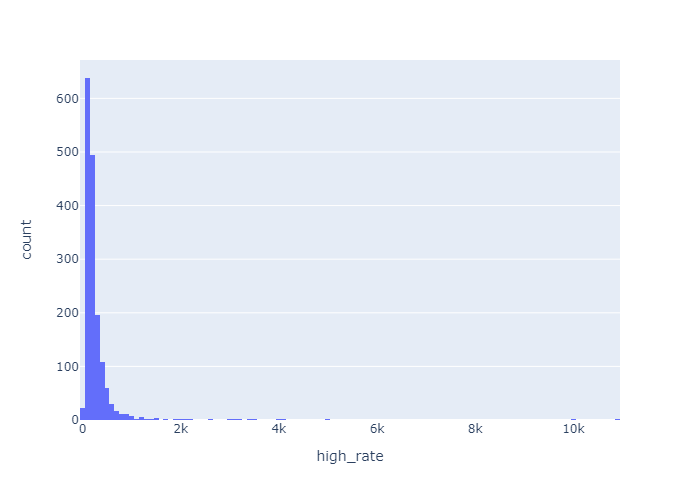

[273.2686238503985]


,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate,postalcodeint
173,528548,Cesar Suites at New York South,381 S 3rd St,Brooklyn,NY,11211,40.70878,-73.95231,3.0,1199.0000,359.1000,11211
816,278067,Ace Hotel New York,20 West 29th Street,New York,NY,10001,40.74587,-73.98823,4.0,1048.9830,177.6384,10001
837,198937,The Kimberly Hotel & Suites,145 E 50th St,New York,NY,10022,40.75614,-73.97151,4.0,1650.2533,188.2860,10022
849,109362,Omni Berkshire Place,21 E 52nd Street,New York,NY,10022,40.75927,-73.97502,4.5,1000.2100,1000.0000,10022
854,163820,Hotel Sofitel New York,45 W 44th St,New York,NY,10036,40.75561,-73.98190,4.5,1036.1801,223.2000,10036
899,109318,Lotte New York Palace,455 Madison Ave,New York,NY,10022,40.75823,-73.97453,4.5,1195.4100,349.4100,10022
901,383834,Dream Downtown,355 W 16th St,New York,NY,10011,40.74195,-74.00369,4.5,5000.3501,299.3600,10011
902,106069,Grand Hyatt New York,109 East 42nd Street,New York,NY,10017,40.75167,-73.97659,4.0,1129.0000,375.6600,10017
905,325735,Trump Soho New York,246 Spring Street,New York,NY,10013,40.72563,-74.00558,5.0,1905.3199,345.3200,10013
939,374895,Hotel 48LEX New York,517 Lexington Avenue,New York,NY,10017,40.75525,-73.97320,4.5,1539.3800,339.0600,10017


In [25]:
import plotly.express as px

fig = px.histogram(pdf, x="high_rate")
fig.show("png")
print([pdf['high_rate'].mean()])
display(pdf[pdf['high_rate'] >= 1000]) #probably going to replace some of the huge outliers with the average of the rest if it throws off the average too much but i think its fine


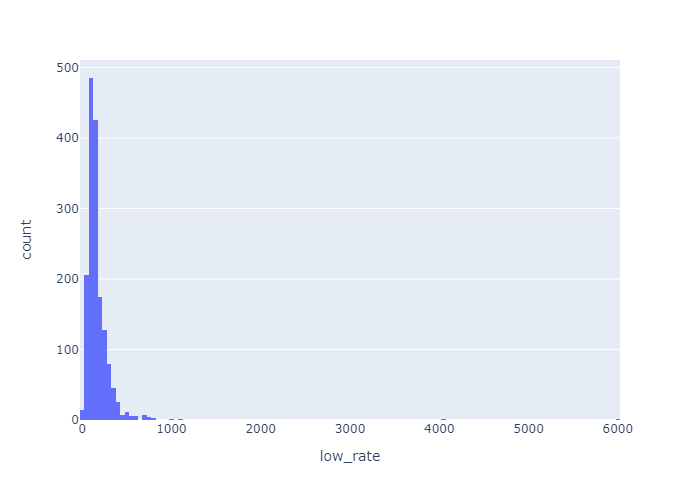

[169.40886646229308]


,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate,postalcodeint
849,109362,Omni Berkshire Place,21 E 52nd Street,New York,NY,10022,40.75927,-73.97502,4.5,1000.210,1000.000,10022
1064,131734,Four Seasons Hotel New York,57 E 57th Street,New York,NY,10022,40.76197,-73.97158,5.0,4061.209,4060.209,10022
1074,183435,The Towers of the Waldorf Astoria New York,100 E 50th St,New York,NY,10022,40.75691,-73.97335,5.0,10000.000,1099.000,10022
1113,532245,Safehouse Suites Manhattan,1600 Broadway,New York,NY,10019,40.76037,-73.98467,5.0,10888.500,5990.250,10019


In [26]:
fig = px.histogram(pdf, x="low_rate")
fig.show("png")
print([pdf['low_rate'].mean()])
display(pdf[pdf['low_rate'] >= 1000])

In [27]:
pdf2 = pd.read_csv(r'./Data/Hotels_Properties_Citywide.csv')

display(pdf2)
pdf2.info()

,PARID,BOROCODE,BLOCK,LOT,TAXYEAR,STREET NUMBER,STREET NAME,Postcode,BLDG_CLASS,TAXCLASS,OWNER_NAME,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1000080039,1,8,39,2021,32,PEARL STREET,10004,H3,4,"32 PEARL, LLC",MANHATTAN,40.703235,-74.012421,101.0,1.0,9.0,1078968.0,1.000080e+09,Battery Park City-Lower Manhattan
1,1000080051,1,8,51,2021,6,WATER STREET,10004,H2,4,AI IV LLC,MANHATTAN,40.702744,-74.012201,101.0,1.0,9.0,1090472.0,1.000080e+09,Battery Park City-Lower Manhattan
2,1000100033,1,10,33,2021,8,STONE STREET,10004,H2,4,"B.H. 8 STONE STREET AG, LLC",MANHATTAN,40.704025,-74.012638,101.0,1.0,9.0,1087618.0,1.000100e+09,Battery Park City-Lower Manhattan
3,1000110029,1,11,29,2021,11,STONE STREET,10004,H2,4,"PREMIER EMERALD, LLC",MANHATTAN,40.704039,-74.012317,101.0,1.0,9.0,1000041.0,1.000110e+09,Battery Park City-Lower Manhattan
4,1000161301,1,16,1301,2021,102,NORTH END AVENUE,10282,RH,4,GOLDMAN SACHS,MANHATTAN,40.714812,-74.016153,101.0,1.0,31703.0,1085867.0,1.000168e+09,Battery Park City-Lower Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5514,5038750026,5,3875,26,2022,630,MIDLAND AVENUE,10306,H4,4,630 MIDLAND CORP,5,40.571192,-74.091057,2.0,50.0,11202.0,5055032.0,5.038750e+09,New Dorp-Midland Beach
5515,5066680094,5,6668,94,2022,51,WILBUR STREET,10309,H4,4,A GUDDEMI,5,40.515283,-74.194552,3.0,51.0,198.0,5082754.0,5.066680e+09,Annadale-Huguenot-Prince's Bay-Eltingville
5516,5070670090,5,7067,90,2022,39,ST LUKES AVENUE,10309,HB,4,JOHN VINCENT SCALIA,5,40.553824,-74.216904,3.0,51.0,20801.0,5086591.0,5.070670e+09,Rossville-Woodrow
5517,5073650001,5,7365,1,2022,2600,VETERANS ROAD WEST,10309,H4,4,M & R ENTERPRISES OF,5,40.533481,-74.224756,3.0,51.0,226.0,5086844.0,5.073650e+09,Charleston-Richmond Valley-Tottenville


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5519 entries, 0 to 5518
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PARID             5519 non-null   int64  
 1   BOROCODE          5519 non-null   int64  
 2   BLOCK             5519 non-null   int64  
 3   LOT               5519 non-null   int64  
 4   TAXYEAR           5519 non-null   int64  
 5   STREET NUMBER     5514 non-null   object 
 6   STREET NAME       5519 non-null   object 
 7   Postcode          5519 non-null   int64  
 8   BLDG_CLASS        5519 non-null   object 
 9   TAXCLASS          5519 non-null   int64  
 10  OWNER_NAME        5519 non-null   object 
 11  Borough           5514 non-null   object 
 12  Latitude          5502 non-null   float64
 13  Longitude         5502 non-null   float64
 14  Community Board   5502 non-null   float64
 15  Council District  5502 non-null   float64
 16  Census Tract      5502 non-null   float64


In [28]:
dfPostN = pdf2[['Postcode','Borough']]
display(dfPostN)

dfnodupes = dfPostN.drop_duplicates()
display(dfnodupes)
print(type(dfnodupes))


def getnames(x):
    mydict = {'1':'MANHATTAN',
            '2':'BRONX',
            '5':'STATEN IS',
            '4':'QUEENS',
            '3':'BROOKLYN'}
    if mydict.get(x) is not None:
        return mydict.get(x)
    return x

def getnames2(x):
    mydict = {'1':'MANHATTAN',
            '2':'BRONX',
            '5':'STATEN IS',
            '4':'QUEENS',
            '3':'BROOKLYN'}
    try:
        if int(x) >= 10001 and int(x) <=10282:
            return mydict.get('1')
        elif int(x) >= 10301 and int(x) <=10314:
            return mydict.get('5')
        elif int(x) >= 10451 and int(x) <=10475:
            return mydict.get('2')
        elif int(x) >= 11004 and int(x) <=11109:
            return mydict.get('4')
        elif int(x) >= 11351 and int(x) <=11697:
            return mydict.get('4')
        elif int(x) >= 11201 and int(x) <=11256:
            return mydict.get('3')
        else:
            return None
    except:
        return None

    
dfnodupes['Neighborhood']=dfnodupes['Borough'].map(lambda x: getnames(x))
dfnodupes.drop(columns=['Borough'],axis=1,inplace=True)
dfnodupes['NeighborhoodAll']=dfnodupes['Postcode'].map(lambda x: getnames2(x))
dfnodupes=dfnodupes.drop_duplicates()
display(dfnodupes)

,Postcode,Borough
0,10004,MANHATTAN
1,10004,MANHATTAN
2,10004,MANHATTAN
3,10004,MANHATTAN
4,10282,MANHATTAN
...,...,...
5514,10306,5
5515,10309,5
5516,10309,5
5517,10309,5


,Postcode,Borough
0,10004,MANHATTAN
4,10282,MANHATTAN
6,10006,MANHATTAN
8,10005,MANHATTAN
24,10038,MANHATTAN
...,...,...
5503,10301,5
5505,10314,5
5511,10305,5
5514,10306,5


<class 'pandas.core.frame.DataFrame'>


C:\Users\shirl\AppData\Local\Temp\ipykernel_18468\1172853656.py:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shirl\AppData\Local\Temp\ipykernel_18468\1172853656.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shirl\AppData\Local\Temp\ipykernel_18468\1172853656.py:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

,Postcode,Neighborhood,NeighborhoodAll
0,10004,MANHATTAN,MANHATTAN
4,10282,MANHATTAN,MANHATTAN
6,10006,MANHATTAN,MANHATTAN
8,10005,MANHATTAN,MANHATTAN
24,10038,MANHATTAN,MANHATTAN
...,...,...,...
3561,10105,MANHATTAN,MANHATTAN
5067,0,BRONX,None
5265,11224,BROOKLYN,BROOKLYN
5350,11102,QUEENS,QUEENS


In [29]:
dfnodupes=dfnodupes[dfnodupes['Postcode'] != 0]
dfnodupes=dfnodupes[~dfnodupes['Neighborhood'].isna()]
display(dfnodupes)
import numpy as np
dfnodupes['check'] = np.where((dfnodupes['Neighborhood'] == dfnodupes['NeighborhoodAll']),1,0)
display(dfnodupes)
print(dfnodupes['check'].sum())

display(dfnodupes[dfnodupes['check']==0]) #this was probably a typo

,Postcode,Neighborhood,NeighborhoodAll
0,10004,MANHATTAN,MANHATTAN
4,10282,MANHATTAN,MANHATTAN
6,10006,MANHATTAN,MANHATTAN
8,10005,MANHATTAN,MANHATTAN
24,10038,MANHATTAN,MANHATTAN
...,...,...,...
2727,10309,STATEN IS,STATEN IS
3561,10105,MANHATTAN,MANHATTAN
5265,11224,BROOKLYN,BROOKLYN
5350,11102,QUEENS,QUEENS


,Postcode,Neighborhood,NeighborhoodAll,check
0,10004,MANHATTAN,MANHATTAN,1
4,10282,MANHATTAN,MANHATTAN,1
6,10006,MANHATTAN,MANHATTAN,1
8,10005,MANHATTAN,MANHATTAN,1
24,10038,MANHATTAN,MANHATTAN,1
...,...,...,...,...
2727,10309,STATEN IS,STATEN IS,1
3561,10105,MANHATTAN,MANHATTAN,1
5265,11224,BROOKLYN,BROOKLYN,1
5350,11102,QUEENS,QUEENS,1


135


,Postcode,Neighborhood,NeighborhoodAll,check
2648,11001,QUEENS,None,0


In [30]:
dfnodupes.rename({'Postcode':'postal_code'},axis=1,inplace=True)
dfnodupes['postal_code'] = dfnodupes['postal_code'].astype(str)
newdf = pd.merge(pdf,dfnodupes,on=['postal_code'],how='left')


display(newdf)
newdf['NeighborhoodAllFinal'] = newdf['postal_code'].map(lambda x: getnames2(x))

display(newdf)

newdf = newdf[~newdf['NeighborhoodAllFinal'].isna()]
display(newdf)


,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate,postalcodeint,Neighborhood,NeighborhoodAll,check
0,269955,Hilton Garden Inn Albany/SUNY Area,1389 Washington Ave,Albany,NY,12206,42.68751,-73.81643,3.0,154.0272,124.0216,12206,NaN,NaN,NaN
1,113431,Courtyard by Marriott Albany Thruway,1455 Washington Avenue,Albany,NY,12206,42.68971,-73.82021,3.0,179.0100,134.0000,12206,NaN,NaN,NaN
2,108151,Radisson Hotel Albany,205 Wolf Rd,Albany,NY,12205,42.72410,-73.79822,3.0,134.1700,84.1600,12205,NaN,NaN,NaN
3,254756,Hilton Garden Inn Albany Medical Center,62 New Scotland Ave,Albany,NY,12208,42.65157,-73.77638,3.0,308.2807,228.4597,12208,NaN,NaN,NaN
4,198232,CrestHill Suites SUNY University Albany,1415 Washington Avenue,Albany,NY,12206,42.68873,-73.81854,3.0,169.3900,89.3900,12206,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,324259,Residence Inn Yonkers Westchester County,7 Executive Blvd,Yonkers,NY,10701,40.97275,-73.88075,3.0,269.3600,169.3600,10701,NaN,NaN,NaN
1627,107949,Ramada Inn Yonkers,125 Tuckahoe Rd,Yonkers,NY,10710,40.95466,-73.86483,2.5,129.0000,119.0000,10710,NaN,NaN,NaN
1628,509723,Hyatt Place New York/Yonkers,7000 Mall Walk,Yonkers,NY,10704,40.92625,-73.85438,3.0,249.3100,199.3100,10704,NaN,NaN,NaN
1629,621870,Hampton Inn & Suites Yonkers - Westchester,555 Tuckahoe Rd,Yonkers,NY,10710,40.95375,-73.84935,2.5,189.1900,134.1800,10710,NaN,NaN,NaN


,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate,postalcodeint,Neighborhood,NeighborhoodAll,check,NeighborhoodAllFinal
0,269955,Hilton Garden Inn Albany/SUNY Area,1389 Washington Ave,Albany,NY,12206,42.68751,-73.81643,3.0,154.0272,124.0216,12206,NaN,NaN,NaN,None
1,113431,Courtyard by Marriott Albany Thruway,1455 Washington Avenue,Albany,NY,12206,42.68971,-73.82021,3.0,179.0100,134.0000,12206,NaN,NaN,NaN,None
2,108151,Radisson Hotel Albany,205 Wolf Rd,Albany,NY,12205,42.72410,-73.79822,3.0,134.1700,84.1600,12205,NaN,NaN,NaN,None
3,254756,Hilton Garden Inn Albany Medical Center,62 New Scotland Ave,Albany,NY,12208,42.65157,-73.77638,3.0,308.2807,228.4597,12208,NaN,NaN,NaN,None
4,198232,CrestHill Suites SUNY University Albany,1415 Washington Avenue,Albany,NY,12206,42.68873,-73.81854,3.0,169.3900,89.3900,12206,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,324259,Residence Inn Yonkers Westchester County,7 Executive Blvd,Yonkers,NY,10701,40.97275,-73.88075,3.0,269.3600,169.3600,10701,NaN,NaN,NaN,None
1627,107949,Ramada Inn Yonkers,125 Tuckahoe Rd,Yonkers,NY,10710,40.95466,-73.86483,2.5,129.0000,119.0000,10710,NaN,NaN,NaN,None
1628,509723,Hyatt Place New York/Yonkers,7000 Mall Walk,Yonkers,NY,10704,40.92625,-73.85438,3.0,249.3100,199.3100,10704,NaN,NaN,NaN,None
1629,621870,Hampton Inn & Suites Yonkers - Westchester,555 Tuckahoe Rd,Yonkers,NY,10710,40.95375,-73.84935,2.5,189.1900,134.1800,10710,NaN,NaN,NaN,None


,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate,postalcodeint,Neighborhood,NeighborhoodAll,check,NeighborhoodAllFinal
62,252608,Fairfield Inn by Marriott New York LaGuardia A...,45-20 Astoria Blvd.,Astoria,NY,11103,40.76791,-73.90563,2.5,169.3500,159.3500,11103,QUEENS,QUEENS,1.0,QUEENS
63,224415,"Super 8 Long Island City, LGA Hotel",31-62 14th Street,Astoria,NY,11106,40.76679,-73.93348,2.0,211.0229,102.0041,11106,QUEENS,QUEENS,1.0,QUEENS
91,220355,Adria Hotel And Conference Center,221-17 Northern Blvd,Bayside,NY,11361,40.76179,-73.75974,3.0,180.1500,160.0000,11361,QUEENS,QUEENS,1.0,QUEENS
92,130161,Anchor Inn,215-34 Northern Blvd,Bayside,NY,11361,40.76076,-73.76612,2.0,185.5300,159.0300,11361,QUEENS,QUEENS,1.0,QUEENS
93,115172,Best Western Queens Gold Coast,220-33 Northern Blvd,Bayside,NY,11361,40.76166,-73.76059,2.5,165.4000,155.4000,11361,QUEENS,QUEENS,1.0,QUEENS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,204733,Red Roof PLUS+ Long Island - Garden City,699 Dibblee Drive,Westbury,NY,11590,40.73797,-73.60283,2.5,158.9900,148.9900,11590,NaN,NaN,NaN,QUEENS
1594,217419,Hilton Garden Inn Westbury,1575 Privado Rd,Westbury,NY,11590,40.74551,-73.58972,3.0,209.0000,169.0000,11590,NaN,NaN,NaN,QUEENS
1595,571546,Courtyard Westbury Long Island,1800 Privado Road,Westbury,NY,11590,40.74554,-73.58937,3.5,269.0700,146.0500,11590,NaN,NaN,NaN,QUEENS
1604,196289,Extended Stay America New York City - LaGuardi...,18 - 30 Whitestone Expwy,Whitestone,NY,11357,40.78267,-73.82539,2.5,116.3600,115.3600,11357,QUEENS,QUEENS,1.0,QUEENS


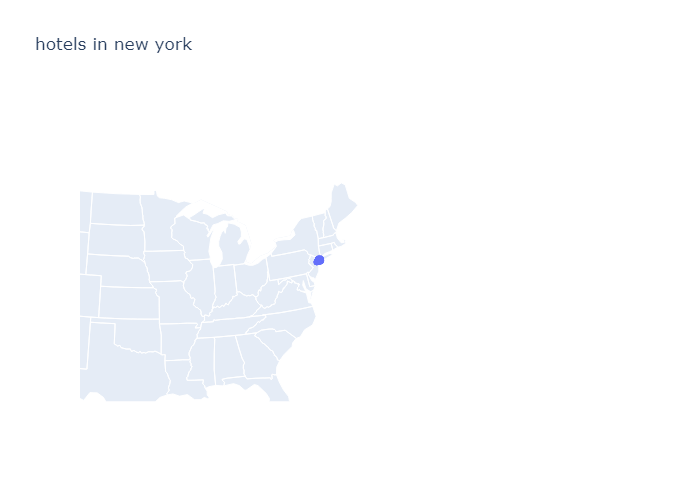

In [31]:
fig = go.Figure(data=go.Scattergeo(
    # locationmode = 'country names',
        lon = newdf['longitude'],
        lat = newdf['latitude'],
        text = newdf['name'],
        mode = 'markers',
        # marker_color = pdf['star_rating'],
        # marker = dict(
        #     size = 8,
        #     opacity = 0.8,
        #     reversescale = True,
        #     autocolorscale = False,
        #     symbol = 'square',
        #     line = dict(
        #         width=1,
        #         color='rgba(102, 102, 102)'
        #     ),
        #     colorscale = 'Blues',
        #     cmin = 0,
        #     color = pdf['star_rating'],
        # ))
)
)

fig.update_layout(
        title = 'hotels in new york',
        geo_scope='usa',
)
fig.update_geos(
        center=dict(lon=-70, lat=40),
        # projection_rotation=dict(lon=30, lat=30, roll=30),
        # lataxis_range=[-50,20], lonaxis_range=[0, 200]
    )
fig.show("png")